# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 76us/step - loss: 0.2700 - accuracy: 0.9224 - val_loss: 0.1325 - val_accuracy: 0.9615
Epoch 2/10
48000/48000 [==============================] - 3s 71us/step - loss: 0.1081 - accuracy: 0.9682 - val_loss: 0.1043 - val_accuracy: 0.9682
Epoch 3/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.0963 - val_accuracy: 0.9718
Epoch 4/10
48000/48000 [==============================] - 3s 68us/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0808 - val_accuracy: 0.9759
Epoch 5/10
48000/48000 [==============================] - 3s 68us/step - loss: 0.0378 - accuracy: 0.9878 - val_loss: 0.0861 - val_accuracy: 0.9737
Epoch 6/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0761 - val_accuracy: 0.9784
Epoch 7/10
48000/48000 [==============================] - 3s 68us/st

# 以圖形顯示訓練過程

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    print(train_history.history)
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

{'val_loss': [0.13250991959497332, 0.10429383041802794, 0.09628449673166808, 0.0808112028275306, 0.08614569446087504, 0.07605159835527107, 0.08937212342286754, 0.0900904369322622, 0.10656483610540939, 0.0939401212149484], 'val_accuracy': [0.9614999890327454, 0.9681666493415833, 0.971833348274231, 0.9759166836738586, 0.9737499952316284, 0.9784166812896729, 0.9762499928474426, 0.9766666889190674, 0.9741666913032532, 0.9775000214576721], 'loss': [0.27001652918880187, 0.10806296890570471, 0.0717490935176611, 0.05149084197729826, 0.03781973078713054, 0.026397157331268923, 0.019947455261591435, 0.017458708247451188, 0.013202988225399167, 0.010334682438032664], 'accuracy': [0.9224375, 0.9682083, 0.97789586, 0.9841875, 0.98777086, 0.9919375, 0.9940417, 0.9941667, 0.9959792, 0.99675]}


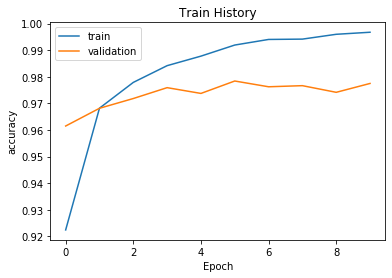

In [18]:
show_train_history(train_history,'accuracy','val_accuracy')

{'val_loss': [0.13250991959497332, 0.10429383041802794, 0.09628449673166808, 0.0808112028275306, 0.08614569446087504, 0.07605159835527107, 0.08937212342286754, 0.0900904369322622, 0.10656483610540939, 0.0939401212149484], 'val_accuracy': [0.9614999890327454, 0.9681666493415833, 0.971833348274231, 0.9759166836738586, 0.9737499952316284, 0.9784166812896729, 0.9762499928474426, 0.9766666889190674, 0.9741666913032532, 0.9775000214576721], 'loss': [0.27001652918880187, 0.10806296890570471, 0.0717490935176611, 0.05149084197729826, 0.03781973078713054, 0.026397157331268923, 0.019947455261591435, 0.017458708247451188, 0.013202988225399167, 0.010334682438032664], 'accuracy': [0.9224375, 0.9682083, 0.97789586, 0.9841875, 0.98777086, 0.9919375, 0.9940417, 0.9941667, 0.9959792, 0.99675]}


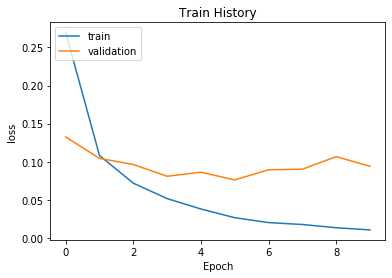

In [19]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [20]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 19us/step

accuracy= 0.9786999821662903
